In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data = pd.read_csv('C:/Users/MLDS/Desktop/examen/projet-git/data/data train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data.head()
print(data.shape)
data.describe()

(47276, 23)


,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,118671.500613,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,68125.928125,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,59910.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,118660.500000,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,177744.250000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,236377.000000,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [3]:
# Vérification des données manquantes
missing_values = data.isnull().sum()
print("Données manquantes par colonne :\n", missing_values)

# Identification des doublons
duplicate_rows = data[data.duplicated()]
print("Nombre de lignes en double :\n", len(duplicate_rows))

# Vérification du nombre de classes (exemple avec la variable 'Diabetes_012')
classes_count = data['Diabetes_012'].value_counts()
print("Nombre de classes dans 'Diabetes_012' :\n", classes_count)

Données manquantes par colonne :
 Unnamed: 0              0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Nombre de lignes en double :
 0
Nombre de classes dans 'Diabetes_012' :
 0    39508
2     6689
1     1079
Name: Diabetes_012, dtype: int64


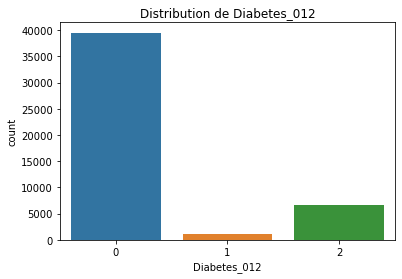

0    83.568830
2    14.148828
1     2.282342
Name: Diabetes_012, dtype: float64


In [4]:
# Analyse de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution de Diabetes_012')
plt.show()
percentage_distribution = data['Diabetes_012'].value_counts(normalize=True) * 100
print(percentage_distribution)

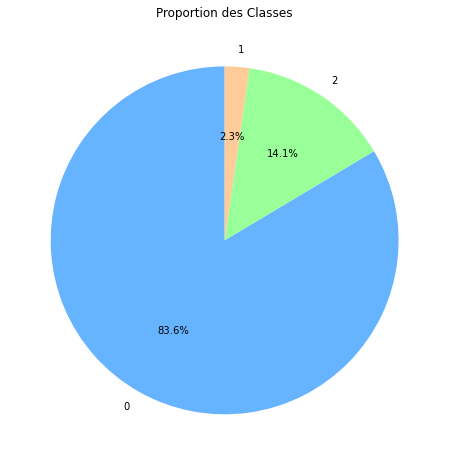

In [5]:
y =data['Diabetes_012']
counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Proportion des Classes')
plt.show()

In [6]:
data = data.drop(columns=['Unnamed: 0'])

In [7]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Separating the features and the target variable
X = data.drop(['Diabetes_012'], axis=1)
y = data['Diabetes_012']  # Correction ici

# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Checking the class distribution after SMOTE
print("Class distribution after applying SMOTE:\n", y_smote.value_counts())


Class distribution after applying SMOTE:
 2    39508
0    39508
1    39508
Name: Diabetes_012, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des caractéristiques et de la variable cible
X = data.drop(['Diabetes_012'], axis=1)
y = data['Diabetes_012']  # Correction ici

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)  # Corrections ici

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Création du modèle SVM
svm_model = LinearSVC()

In [10]:
# Entraînement du modèle sur les données normalisées
svm_model.fit(X_train_scaled, y_train)

C:\Users\MLDS\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\MLDS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [11]:
#utilisation du modèle pour la prédiction
y_pred = svm_model.predict(X_test_scaled)

In [12]:
# Affichage du rapport de classification
print(classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      8052
           1       0.52      0.42      0.47      7921
           2       0.53      0.57      0.55      7732

    accuracy                           0.56     23705
   macro avg       0.55      0.56      0.55     23705
weighted avg       0.55      0.56      0.55     23705

Matrice de confusion :
 [[5466 1187 1399]
 [2106 3346 2469]
 [1489 1871 4372]]
